In [457]:
import numpy as np
import os
import csv

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

from ase.io import read, write, Trajectory
from ase.visualize import view
from ase.atoms import Atoms
from ase.build import molecule
from ase.build import minimize_rotation_and_translation
from ase.visualize.plot import plot_atoms

In [208]:
path_plot1 = "results/snu-70"
path_plot2 = "results/uio-66-nh2"
path_plot3 = "results/mof-5-oh"

save_path = "plots/"

In [209]:
def npy_orientations(pathto):

    orientations = np.load(f'{pathto}/orientations.npy')

    list_node_flip_orientations = []
    list_axis_flip_orientations = []
    for orientation in orientations:
        sum_node_flip_orientations = 0
        sum_axis_flip_orientations = 0
        for i in orientation:
            sum_node_flip_orientations += int(bin(i)[2:].zfill(2)[0])
            sum_axis_flip_orientations += int(bin(i)[2:].zfill(2)[1])
        list_node_flip_orientations.append(sum_node_flip_orientations)
        list_axis_flip_orientations.append(sum_axis_flip_orientations)
    np.save(f'{pathto}/node_flip_orientations_list.npy', np.array(list_node_flip_orientations))
    np.save(f'{pathto}/axis_flip_orientations_list.npy', np.array(list_axis_flip_orientations))

In [ ]:
npy_orientations(path_plot1)
npy_orientations(path_plot2)
npy_orientations(path_plot3)

In [213]:
def plot_orientations(pathtonodeflipsSNU70, 
                      pathtoaxisflipsSNU70, 
                      pathtonodeflipsUiO66, 
                      pathtoaxisflipsUiO66, 
                      pathtonodeflipsMOF5OH,
                      pathtoaxisflipsMOF5OH,
                      start_index_histogram_SNU70=0, 
                      start_index_histogram_UiO66=0,
                      start_index_histogram_MOF5OH=0,):

    pathtonodeflipsSNU70 = np.load(pathtonodeflipsSNU70).tolist()
    pathtoaxisflipsSNU70 = np.load(pathtoaxisflipsSNU70).tolist()
    pathtonodeflipsUiO66 = np.load(pathtonodeflipsUiO66).tolist()
    pathtoaxisflipsUiO66 = np.load(pathtoaxisflipsUiO66).tolist()
    pathtonodeflipsMOF5OH = np.load(pathtonodeflipsMOF5OH).tolist()
    pathtoaxisflipsMOF5OH = np.load(pathtoaxisflipsMOF5OH).tolist()

    max_occ_snu = max([pathtonodeflipsSNU70[start_index_histogram_SNU70:].count(max(set(pathtonodeflipsSNU70[start_index_histogram_SNU70:]), key=pathtonodeflipsSNU70[start_index_histogram_SNU70:].count)), pathtoaxisflipsSNU70[start_index_histogram_SNU70:].count(max(set(pathtoaxisflipsSNU70[start_index_histogram_SNU70:]), key=pathtoaxisflipsSNU70[start_index_histogram_SNU70:].count))])
    max_occ_uio = max([pathtonodeflipsUiO66[start_index_histogram_UiO66:].count(max(set(pathtonodeflipsUiO66[start_index_histogram_UiO66:]), key=pathtonodeflipsUiO66[start_index_histogram_UiO66:].count)), pathtoaxisflipsUiO66[start_index_histogram_UiO66:].count(max(set(pathtoaxisflipsUiO66[start_index_histogram_UiO66:]), key=pathtoaxisflipsUiO66[start_index_histogram_UiO66:].count))])
    max_occ_mof = max([pathtonodeflipsMOF5OH[start_index_histogram_MOF5OH:].count(max(set(pathtonodeflipsMOF5OH[start_index_histogram_MOF5OH:]), key=pathtonodeflipsMOF5OH[start_index_histogram_MOF5OH:].count)), pathtoaxisflipsMOF5OH[start_index_histogram_MOF5OH:].count(max(set(pathtoaxisflipsMOF5OH[start_index_histogram_MOF5OH:]), key=pathtoaxisflipsMOF5OH[start_index_histogram_MOF5OH:].count))])

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

    axes[0, 0].text(-0.15, 0.95, r'a)', transform=axes[0, 0].transAxes, size=18)
    axes[1, 0].text(-0.15, 0.95, r'b)', transform=axes[1, 0].transAxes, size=18)
    axes[2, 0].text(-0.15, 0.95, r'c)', transform=axes[2, 0].transAxes, size=18)

    axes[0, 1].text(0.975, 0.92, r'MOF-5-OH', transform=axes[0, 1].transAxes, size=18, horizontalalignment='right')
    axes[1, 1].text(0.975, 0.92, r'SNU-70', transform=axes[1, 1].transAxes, size=18, horizontalalignment='right')
    axes[2, 1].text(0.975, 0.92, r'UiO-66(Zr)-NH$_2$', transform=axes[2, 1].transAxes, size=18, horizontalalignment='right')

    axes[0, 0].hlines(12, -50, 4000, color='black', linestyle='--', alpha=0.7)
    axes[1, 0].hlines(12, -50, 4000, color='black', linestyle='--', alpha=0.7)
    axes[2, 0].hlines(12, -50, 4000, color='black', linestyle='--', alpha=0.7)

    axes[0, 1].hlines(12, -50, 4000, color='black', linestyle='--', alpha=0.7)
    axes[1, 1].hlines(12, -50, 4000, color='black', linestyle='--', alpha=0.7)
    axes[2, 1].hlines(12, -50, 4000, color='black', linestyle='--', alpha=0.7)

    axes[0, 0].plot(pathtonodeflipsMOF5OH, color='firebrick', label='Nodal orientation', linewidth=2, alpha=0.6)
    axes[0, 0].plot(pathtoaxisflipsMOF5OH, color='dodgerblue', label='Axial orientation', linewidth=2, alpha=0.6)
    #axes[0, 0].set_xlabel(r'$N_\mathrm{MC}$', size=18)
    axes[0, 0].set_xlim(-25, len(pathtonodeflipsMOF5OH) + 25)
    axes[0, 0].set_xticks(np.arange(0, len(pathtonodeflipsMOF5OH), 250))
    axes[0, 0].tick_params(axis='x', labelsize=16)
    axes[0, 0].set_ylabel(r'$N_\mathrm{rot}$', size=20, labelpad=10)
    axes[0, 0].set_ylim(-1, 25)
    axes[0, 0].set_yticks(np.arange(0, 25, 4))
    axes[0, 0].tick_params(axis='y', labelsize=16)
    axes[0, 0].legend(fontsize=14, loc='upper left')
    axes[0, 0].vlines(start_index_histogram_MOF5OH, -1, 25, color='black', linestyle='--', alpha=0.7)
    axes[0, 1].hist(pathtonodeflipsMOF5OH[start_index_histogram_MOF5OH:], bins=np.arange(0, 25, 1), color='firebrick', alpha=0.6, label='Nodal orientation', orientation='horizontal')
    axes[0, 1].hist(pathtoaxisflipsMOF5OH[start_index_histogram_MOF5OH:], bins=np.arange(0, 25, 1), color='dodgerblue', alpha=0.6, label='Axial orientation', orientation='horizontal')
    #axes[0, 1].set_xlabel('Occurrence', size=18)
    axes[0, 1].set_ylim(axes[0, 1].get_ylim())
    axes[0, 1].set_xlim(0, max_occ_mof+5)
    axes[0, 1].set_yticks(np.arange(0, 25, 4))  # Adding y-ticks
    axes[0, 1].set_ylabel(r'$N_\mathrm{rot}$', size=20, labelpad=10)  # Adding y-label
    axes[0, 1].yaxis.set_label_position("right")  # Move y-label to right
    axes[0, 1].yaxis.tick_right()  # Move y-ticks to right
    axes[0, 1].tick_params(axis='x', labelsize=16)
    axes[0, 1].tick_params(axis='y', labelsize=16)
    axes[0, 1].legend(fontsize=14, loc='upper left')

    axes[1, 0].plot(pathtonodeflipsSNU70, color='firebrick', label='Nodal orientation', linewidth=2, alpha=0.6)
    axes[1, 0].plot(pathtoaxisflipsSNU70, color='dodgerblue', label='Axial orientation', linewidth=2, alpha=0.6)
    #axes[1, 0].set_xlabel(r'$N_\mathrm{MC}$', size=18)
    axes[1, 0].set_xlim(-25, len(pathtonodeflipsSNU70) + 25)
    axes[1, 0].set_xticks(np.arange(0, len(pathtonodeflipsSNU70), 250))
    axes[1, 0].tick_params(axis='x', labelsize=16)
    axes[1, 0].set_ylabel(r'$N_\mathrm{rot}$', size=20, labelpad=10)
    axes[1, 0].set_ylim(-1, 25)
    axes[1, 0].set_yticks(np.arange(0, 25, 4))
    axes[1, 0].tick_params(axis='y', labelsize=16)
    axes[1, 0].legend(fontsize=14, loc='upper left')
    axes[1, 0].vlines(start_index_histogram_SNU70, -1, 25, color='black', linestyle='--', alpha=0.7)
    axes[1, 1].hist(pathtonodeflipsSNU70[start_index_histogram_SNU70:], bins=np.arange(0, 25, 1), color='firebrick', alpha=0.6, label='Nodal orientation', orientation='horizontal')
    axes[1, 1].hist(pathtoaxisflipsSNU70[start_index_histogram_SNU70:], bins=np.arange(0, 25, 1), color='dodgerblue', alpha=0.6, label='Axial orientation', orientation='horizontal')
    #axes[1, 1].set_xlabel('Occurrence', size=18)
    axes[1, 1].set_ylim(axes[0, 1].get_ylim())
    axes[1, 1].set_xlim(0, max_occ_snu+5)
    axes[1, 1].set_yticks(np.arange(0, 25, 4))  # Adding y-ticks
    axes[1, 1].set_ylabel(r'$N_\mathrm{rot}$', size=20, labelpad=10)  # Adding y-label
    axes[1, 1].yaxis.set_label_position("right")  # Move y-label to right
    axes[1, 1].yaxis.tick_right()  # Move y-ticks to right
    axes[1, 1].tick_params(axis='x', labelsize=16)
    axes[1, 1].tick_params(axis='y', labelsize=16)
    axes[1, 1].legend(fontsize=14, loc='upper left')

    axes[2, 0].plot(pathtonodeflipsUiO66, color='firebrick', label='Nodal orientation', linewidth=2, alpha=0.6)
    axes[2, 0].plot(pathtoaxisflipsUiO66, color='dodgerblue', label='Axial orientation', linewidth=2, alpha=0.6)
    axes[2, 0].set_xlabel(r'$N_\mathrm{MC}$', size=18)
    axes[2, 0].set_xlim(-25, len(pathtonodeflipsUiO66) + 25)
    axes[2, 0].set_xticks(np.arange(0, len(pathtonodeflipsUiO66), 250))
    axes[2, 0].tick_params(axis='x', labelsize=16)
    axes[2, 0].set_ylabel(r'$N_\mathrm{rot}$', size=20, labelpad=10)
    axes[2, 0].set_ylim(-1, 25)
    axes[2, 0].set_yticks(np.arange(0, 25, 4))
    axes[2, 0].tick_params(axis='y', labelsize=16)
    axes[2, 0].legend(fontsize=14, loc='upper left')
    axes[2, 0].vlines(start_index_histogram_UiO66, -1, 25, color='black', linestyle='--', alpha=0.7)
    axes[2, 1].hist(pathtonodeflipsUiO66[start_index_histogram_UiO66:], bins=np.arange(0, 25, 1), color='firebrick', alpha=0.6, label='Nodal orientation', orientation='horizontal')
    axes[2, 1].hist(pathtoaxisflipsUiO66[start_index_histogram_UiO66:], bins=np.arange(0, 25, 1), color='dodgerblue', alpha=0.6, label='Axial orientation', orientation='horizontal')
    axes[2, 1].set_xlabel('Occurrence', size=18)
    axes[2, 1].set_ylim(axes[0, 1].get_ylim())
    axes[2, 1].set_xlim(0, max_occ_uio+5)
    axes[2, 1].set_yticks(np.arange(0, 25, 4))  # Adding y-ticks
    axes[2, 1].set_ylabel(r'$N_\mathrm{rot}$' , size=20, labelpad=10)  # Adding y-label
    axes[2, 1].yaxis.set_label_position("right")  # Move y-label to right
    axes[2, 1].yaxis.tick_right()  # Move y-ticks to right
    axes[2, 1].tick_params(axis='x', labelsize=16)
    axes[2, 1].tick_params(axis='y', labelsize=16)
    axes[2, 1].legend(fontsize=14, loc='upper left')


    plt.subplots_adjust(wspace=0.0, hspace=0.2)
    plt.savefig(save_path+'/orientations.pdf', pad_inches=0.1, bbox_inches='tight')
    plt.show()

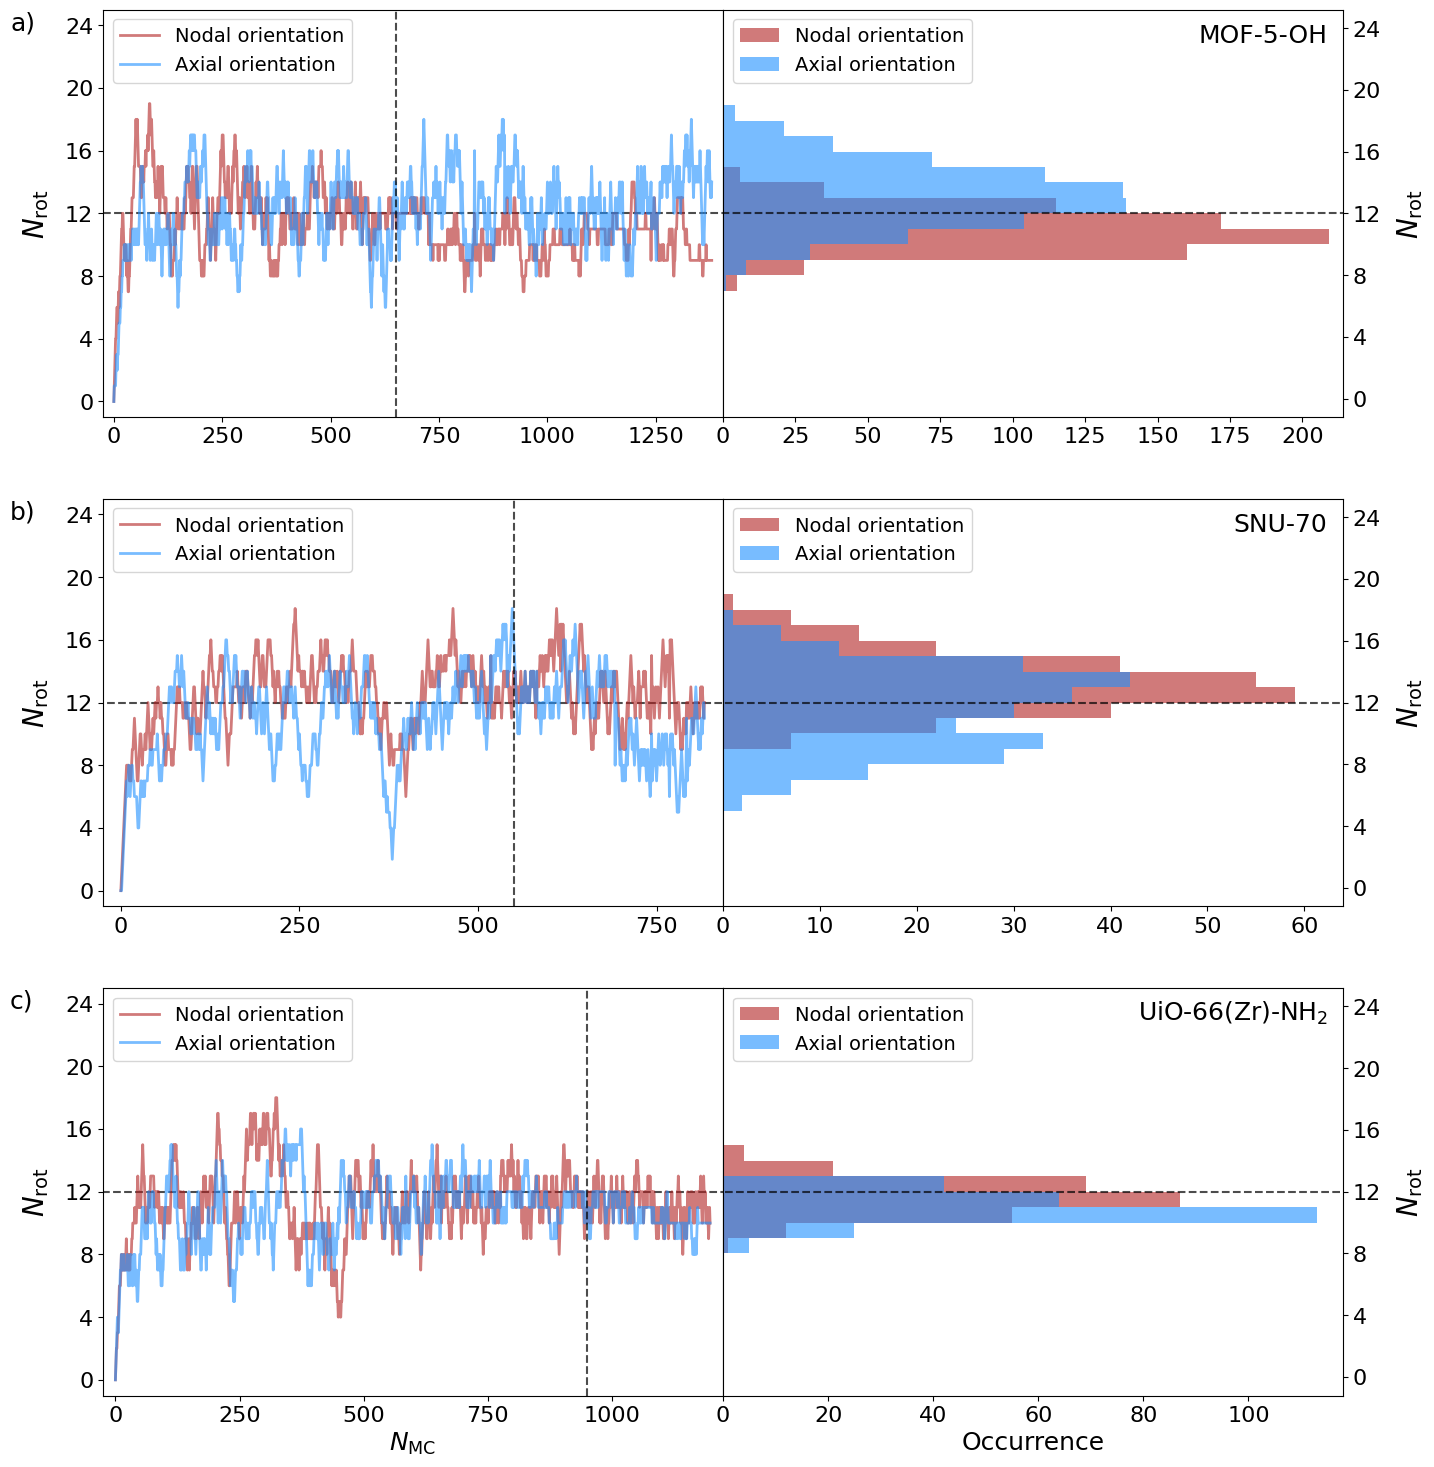

In [214]:
plot_orientations(path_plot1+'/node_flip_orientations_list.npy',
                  path_plot1+'/axis_flip_orientations_list.npy', 
                  path_plot2+'/node_flip_orientations_list.npy', 
                  path_plot2+'/axis_flip_orientations_list.npy', 
                  path_plot3+'/node_flip_orientations_list.npy', 
                  path_plot3+'/axis_flip_orientations_list.npy', 
                  start_index_histogram_SNU70=550, 
                  start_index_histogram_UiO66=950,
                  start_index_histogram_MOF5OH=650)

In [219]:
def npy_energies(pathto):
    
    traj = read(f'{pathto}/traj_annealing.traj', index=':')
    potential_energy_list = []
    for i in traj:
        energy = i.get_potential_energy()
        potential_energy_list.append(float(energy)*96.485)
    
    np.save(f'{pathto}/potential_energy_list.npy', np.array(potential_energy_list))

In [220]:
npy_energies(path_plot1)
npy_energies(path_plot2)
npy_energies(path_plot3)

In [472]:
def plot_energies(pathtoSNU70, pathtoUiO66, pathtoMOF5OH):
    
    pathtoSNU70 = np.load(pathtoSNU70).tolist()
    pathtoUiO66 = np.load(pathtoUiO66).tolist()
    pathtoMOF5OH = np.load(pathtoMOF5OH).tolist()

    potential_energy_firstMOF5OH = pathtoMOF5OH[0]
    shifted_potential_energy_listMOF5OH = []
    for energy in pathtoMOF5OH:
        shifted_potential_energy = energy - potential_energy_firstMOF5OH
        shifted_potential_energy_listMOF5OH.append(shifted_potential_energy)
    min_energyMOF5OH = min(shifted_potential_energy_listMOF5OH)

    potential_energy_firstSNU70 = pathtoSNU70[0]
    shifted_potential_energy_listSNU70 = []
    for energy in pathtoSNU70:
        shifted_potential_energy = energy - potential_energy_firstSNU70
        shifted_potential_energy_listSNU70.append(shifted_potential_energy)
    min_energySNU70 = min(shifted_potential_energy_listSNU70)

    potential_energy_firstUiO66 = pathtoUiO66[0]
    shifted_potential_energy_listUiO66 = []
    for energy in pathtoUiO66:
        shifted_potential_energy = energy - potential_energy_firstUiO66
        shifted_potential_energy_listUiO66.append(shifted_potential_energy)
    min_energyUiO66 = min(shifted_potential_energy_listUiO66)

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))
    plt.subplots_adjust(wspace=0.1)

    # axes[0].text(0, 1.075, r'a) SNU-70', transform=axes[0].transAxes, size=18)
    # axes[1].text(0, 1.075, r'b) UiO-66(Zr)-NH$_2$', transform=axes[1].transAxes, size=18)

    axes[0].text(-0.1, 0.95, r'a)', transform=axes[0].transAxes, size=18)
    axes[1].text(-0.07, 0.95, r'b)', transform=axes[1].transAxes, size=18)
    axes[2].text(-0.07, 0.95, r'c)', transform=axes[2].transAxes, size=18)

    axes[0].text(0.975, 0.85, r'MOF-5-OH', transform=axes[0].transAxes, size=18, horizontalalignment='right')
    axes[1].text(0.975, 0.85, r'SNU-70', transform=axes[1].transAxes, size=18, horizontalalignment='right')
    axes[2].text(0.975, 0.85, r'UiO-66(Zr)-NH$_2$', transform=axes[2].transAxes, size=18, horizontalalignment='right')

    axes[0].plot(shifted_potential_energy_listMOF5OH, color='black', linewidth=1.5)
    axes[0].axhline(y=min_energyMOF5OH, color='dodgerblue', linestyle='--', linewidth=2.5, alpha=0.6)
    axes[0].axhline(y=0, color='firebrick', linestyle='--', linewidth=2.5, alpha=0.6)
    axes[0].annotate('', xy=(len(shifted_potential_energy_listMOF5OH) / 2, min_energyMOF5OH), xytext=(len(shifted_potential_energy_listMOF5OH) / 2, 0), arrowprops=dict(arrowstyle='<->', color='gray', lw=3, mutation_scale=25))
    axes[0].text(len(shifted_potential_energy_listMOF5OH)*0.55, (min_energyMOF5OH - 0.0)*1/3, f'{(0.0 - min_energyMOF5OH):.1f}' + r' kJ$\cdot$mol$^{-1}$', color='gray', fontsize=20)
    #axes[0].set_xlabel('$N_\mathrm{MC}$', size=18)
    axes[0].tick_params(labelsize =16)
    axes[0].set_ylabel(r'$V_\mathrm{rel}$ / kJ$\cdot$mol$^{-1}$', size=18)
    axes[0].set_ylabel(r'$V_\mathrm{rel}$ / kJ$\cdot$mol$^{-1}$', size=18)
    axes[0].set_xlim(-25,1425)

    axes[1].plot(shifted_potential_energy_listSNU70, color='black', linewidth=1.5)
    axes[1].axhline(y=min_energySNU70, color='dodgerblue', linestyle='--', linewidth=2.5, alpha=0.6)
    axes[1].axhline(y=0, color='firebrick', linestyle='--', linewidth=2.5, alpha=0.6)
    axes[1].annotate('', xy=(len(shifted_potential_energy_listSNU70) / 2, min_energySNU70), xytext=(len(shifted_potential_energy_listSNU70) / 2, 0), arrowprops=dict(arrowstyle='<->', color='gray', lw=3, mutation_scale=25))
    axes[1].text(len(shifted_potential_energy_listSNU70)*0.55, (min_energySNU70 - 0.0)*1/3, f'{(0.0 - min_energySNU70):.1f}' + r' kJ$\cdot$mol$^{-1}$', color='gray', fontsize=20)
    #axes[1].set_xlabel('$N_\mathrm{MC}$', size=19)
    axes[1].tick_params(labelsize =16)


    axes[2].plot(shifted_potential_energy_listUiO66, color='black', linewidth=1.5)
    axes[2].axhline(y=min_energyUiO66, color='dodgerblue', linestyle='--', linewidth=2.5, alpha=0.6)
    axes[2].axhline(y=0, color='firebrick', linestyle='--', linewidth=2.5, alpha=0.6)
    axes[2].annotate('', xy=(len(shifted_potential_energy_listUiO66) / 2, min_energyUiO66), xytext=(len(shifted_potential_energy_listUiO66) / 2, 0), arrowprops=dict(arrowstyle='<->', color='gray', lw=3, mutation_scale=25))
    axes[2].text(len(shifted_potential_energy_listUiO66)*0.55, (min_energyUiO66 - 0.0)*1/3, f'{(0.0 - min_energyUiO66):.1f}' + r' kJ$\cdot$mol$^{-1}$', color='gray', fontsize=20)
    axes[2].set_xlabel(r'$N_\mathrm{MC}$', size=20)
    axes[2].tick_params(labelsize =16)
    axes[2].set_ylabel(r'$V_\mathrm{rel}$ / kJ$\cdot$mol$^{-1}$', size=18)
    #axes[2].yaxis.set_label_position("right")  # Move y-label to right
    #axes[2].yaxis.tick_right()  # Move y-ticks to right

    plt.savefig(save_path+'/energies.pdf', pad_inches=0.1, bbox_inches='tight')
    plt.show()

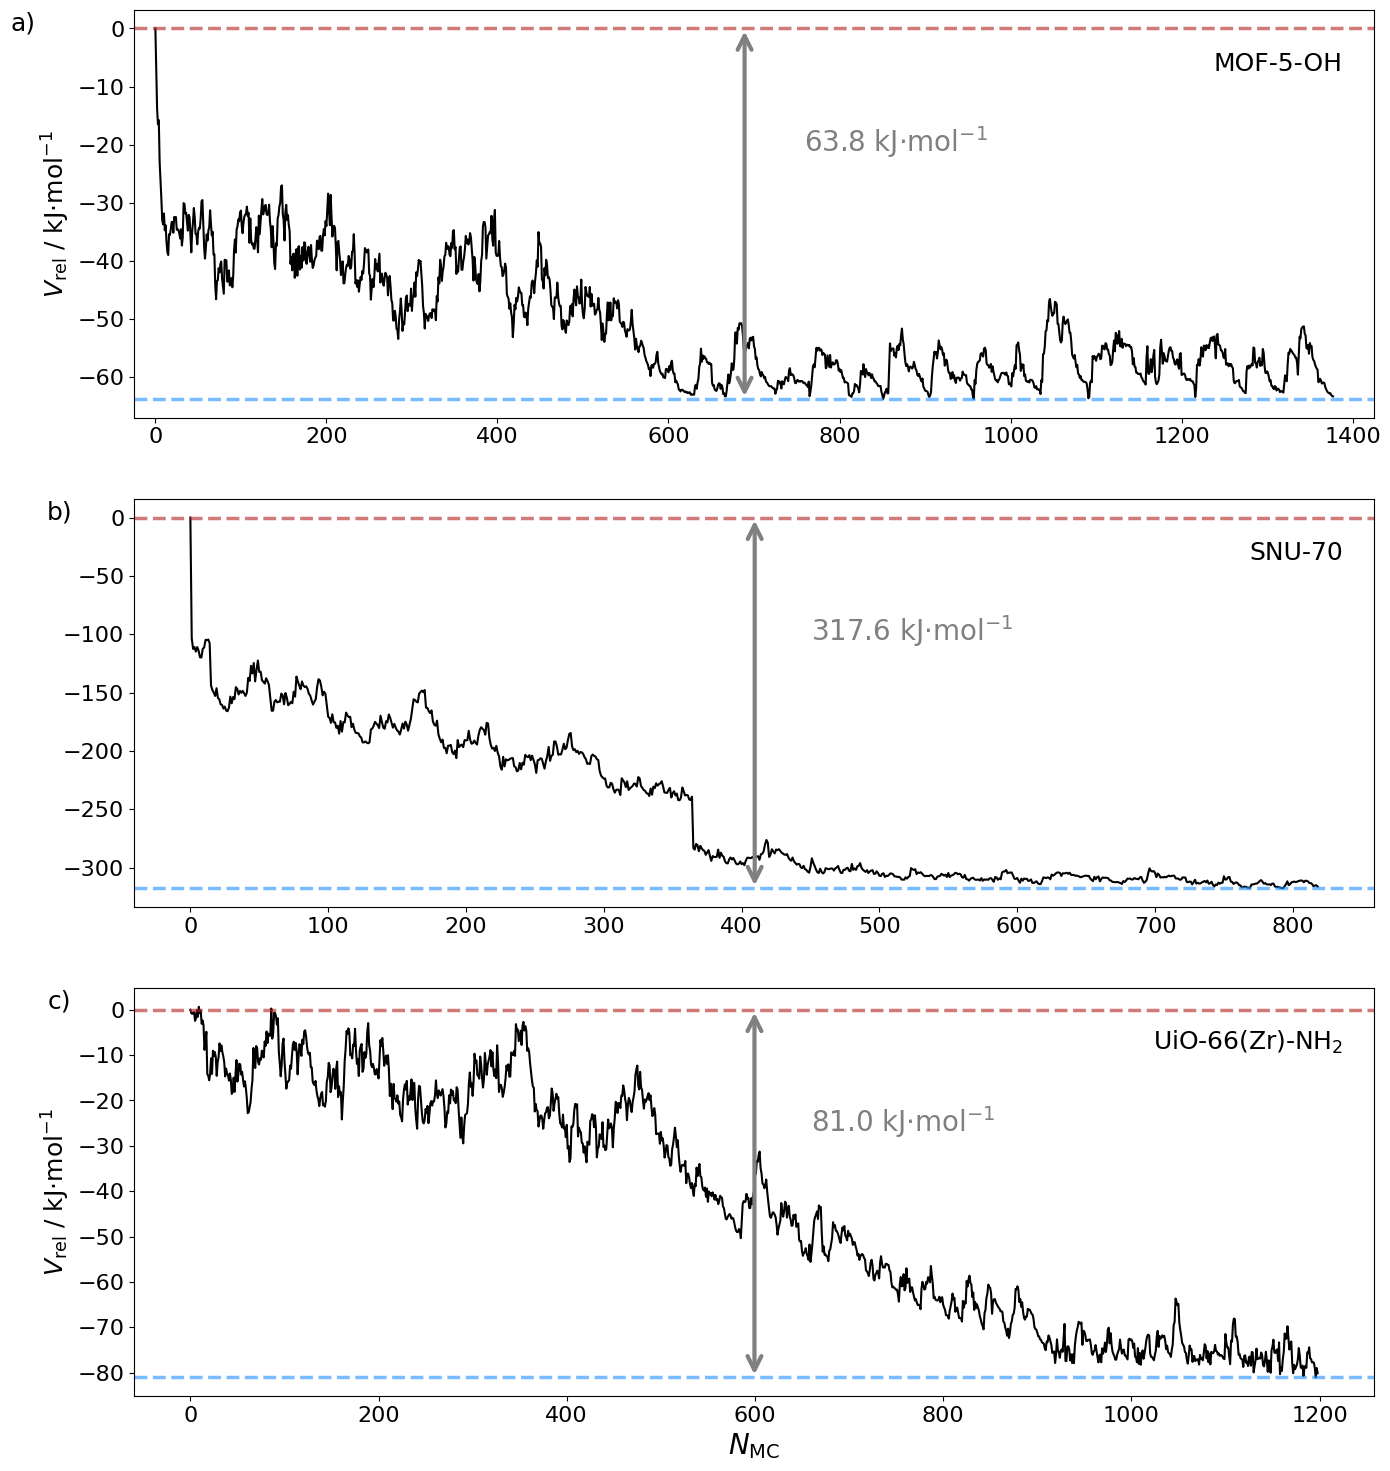

In [473]:
plot_energies(path_plot1+'/potential_energy_list.npy', 
              path_plot2+'/potential_energy_list.npy', 
              path_plot3+'/potential_energy_list.npy')

In [477]:
def remove_pbc(atoms):
    # positions
    positions = atoms.get_positions()
    # split positions relative to minimum position
    min_position = np.min(positions, axis=0)
    split_positions = (positions - min_position) > atoms.cell.cellpar()[:3] / 2
    # correct positions
    _positions = np.where(split_positions, positions - atoms.cell.cellpar()[:3], positions)
    # set positions
    atoms.set_positions(_positions)
    return atoms

def clean_all_sbus_amino_uio66(atoms):
    index_start = -72
    atoms = atoms[index_start:]
    nZr = 6
    nO = 4
    nOH = 8
    nSbu = 4
    _atoms = Atoms()
    _atoms.set_cell(atoms.get_cell())

    for i in range(0, 4):
        oh_start = 0
        zr_start = 4*nOH
        o_start = 4*nOH + 4*nZr
        sbu = atoms[oh_start + i*nOH:(i+1)*nOH:2] + atoms[zr_start + i*nZr:zr_start + (i+1)*nZr] + atoms[o_start + i*nO:o_start + (i+1)*nO]
        sbu = remove_pbc(sbu)
        _atoms += sbu
    return _atoms

def clean_all_sbus_snu70(atoms):
    index_start = -40
    atoms = atoms[index_start:]
    return atoms

def clean_all_sbus_mof5oh(atoms):
    index_start = -40
    atoms = atoms[index_start:]
    return atoms

def rmsd(atoms1, atoms2):
    com1 = atoms1.get_center_of_mass()
    atoms1.translate(-com1)
    com2 = atoms2.get_center_of_mass()
    atoms2.translate(-com2)
    rmsd = np.sqrt(np.sum(np.linalg.norm(atoms1.positions - atoms2.positions, axis=1)**2) / len(atoms1))
    return rmsd

def npy_SBUrmsd(pathto):
    traj = read(f'{pathto}/traj_annealing.traj',index=':')
    if 'uio-66' in pathto:
        clean_all_sbus = clean_all_sbus_amino_uio66
    elif 'snu-70' in pathto:
        clean_all_sbus = clean_all_sbus_snu70
    elif 'mof-5-oh' in pathto:
        clean_all_sbus = clean_all_sbus_mof5oh
    else:
        raise ValueError("Unknown structure type in path")
    cleaned = [clean_all_sbus(atoms) for atoms in traj]

    rmsd_matrix = np.zeros((len(cleaned), len(cleaned)))

    for i, atoms1 in enumerate(cleaned):
        for j, atoms2 in enumerate(cleaned):
            rmsd_matrix[i,j] = rmsd(atoms1.copy(), atoms2.copy())

    np.save(f'{pathto}/rmsd_matrix.npy', rmsd_matrix)

def plot_SBUrmsd(pathtoSNU70, pathtoUiO66, pathtoMOF5OH):

    rmsd_matrix_SNU70  = np.load(pathtoSNU70)
    rmsd_matrix_UiO66  = np.load(pathtoUiO66)
    rmsd_matrix_MOF5OH = np.load(pathtoMOF5OH)
    cmap = plt.get_cmap('RdBu_r')
    plt.style.use('default')

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
    plt.subplots_adjust(wspace=0.2, hspace=0.15)

    # axes[0, 0].text(-0.15, 1.1, r'a) SNU-70', transform=axes[0, 0].transAxes, size=18)
    # axes[1, 0].text(-0.15, 1.1, r'b) UiO-66(Zr)-NH$_2$', transform=axes[1, 0].transAxes, size=18)

    axes[0, 0].text(-0.2, 0.975, r'a)', transform=axes[0, 0].transAxes, size=18)
    axes[1, 0].text(-0.2, 0.975, r'b)', transform=axes[1, 0].transAxes, size=18)
    axes[2, 0].text(-0.2, 0.975, r'c)', transform=axes[2, 0].transAxes, size=18)

    axes[0, 0].text(0.95, 0.05, r'MOF-5-OH', transform=axes[0, 1].transAxes, size=18, horizontalalignment='right')
    axes[1, 0].text(0.95, 0.05, r'SNU-70', transform=axes[1, 1].transAxes, size=18, horizontalalignment='right')
    axes[2, 0].text(0.95, 0.05, r'UiO-66(Zr)-NH$_2$', transform=axes[2, 1].transAxes, size=18, horizontalalignment='right')

    im0 = axes[0, 1].imshow(rmsd_matrix_MOF5OH, 
                            cmap=cmap, 
                            vmin=np.min(rmsd_matrix_MOF5OH), 
                            vmax=np.max(rmsd_matrix_MOF5OH))
    
    cbar = plt.colorbar(im0, ax=axes[0, 1])
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label(r'RMSD$_\mathrm{i}$ / Å', size=18)
    #axes[0, 1].set_xlabel(r'$N_\mathrm{MC}$', size = 18)
    axes[0, 1].set_ylabel(r'$N_\mathrm{MC}$', size = 20)
    axes[0, 1].tick_params(labelsize =16)
    axes[0, 1].invert_yaxis()

    im1 = axes[1, 1].imshow(rmsd_matrix_SNU70, 
                            cmap=cmap, 
                            vmin=np.min(rmsd_matrix_SNU70), 
                            vmax=np.max(rmsd_matrix_SNU70))
    
    cbar = plt.colorbar(im1, ax=axes[1, 1])
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label(r'RMSD$_\mathrm{i}$ / Å', size=18)
    #axes[1, 1].set_xlabel(r'$N_\mathrm{MC}$', size = 18)
    axes[1, 1].set_ylabel(r'$N_\mathrm{MC}$', size = 20)
    axes[1, 1].tick_params(labelsize =16)
    axes[1, 1].invert_yaxis()

    im2 = axes[2, 1].imshow(rmsd_matrix_UiO66, 
                            cmap=cmap, 
                            vmin=np.min(rmsd_matrix_UiO66), 
                            vmax=np.max(rmsd_matrix_UiO66))
    
    cbar = plt.colorbar(im2, ax=axes[2, 1])
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label(r'RMSD$_\mathrm{i}$ / Å', size=18)
    axes[2, 1].set_xlabel(r'$N_\mathrm{MC}$', size = 20)
    axes[2, 1].set_ylabel(r'$N_\mathrm{MC}$', size = 20)
    axes[2, 1].tick_params(labelsize =16)
    axes[2, 1].invert_yaxis()

    axes[0, 0].plot(rmsd_matrix_MOF5OH[0], color='black', linewidth=1.5)
    #axes[0, 0].set_xlabel(r'$N_\mathrm{MC}$', size=18)
    axes[0, 0].tick_params(labelsize =16)
    axes[0, 0].set_ylabel(r'RMSD$_\mathrm{i}$ / Å', size=18)
    #axes[0, 0].yaxis.set_label_position("right") 
    #axes[0, 0].yaxis.tick_right() 

    axes[1, 0].plot(rmsd_matrix_SNU70[0], color='black', linewidth=1.5)
    #axes[1, 0].set_xlabel(r'$N_\mathrm{MC}$', size=18)
    axes[1, 0].tick_params(labelsize =16)
    axes[1, 0].set_ylabel(r'RMSD$_\mathrm{i}$ / Å', size=18)
    #axes[1, 0].yaxis.set_label_position("right") 
    #axes[1, 0].yaxis.tick_right() 

    axes[2, 0].plot(rmsd_matrix_UiO66[0], color='black', linewidth=1.5)
    axes[2, 0].set_xlabel(r'$N_\mathrm{MC}$', size=20)
    axes[2, 0].tick_params(labelsize =16)
    axes[2, 0].set_ylabel(r'RMSD$_\mathrm{i}$ / Å', size=18)
    #axes[2, 0].yaxis.set_label_position("right") 
    #axes[2, 0].yaxis.tick_right()

    plt.savefig(save_path+'/rmsdplot.pdf', pad_inches=0.1, bbox_inches='tight')
    plt.show()

In [227]:
npy_SBUrmsd(path_plot1)
npy_SBUrmsd(path_plot2)
npy_SBUrmsd(path_plot3)

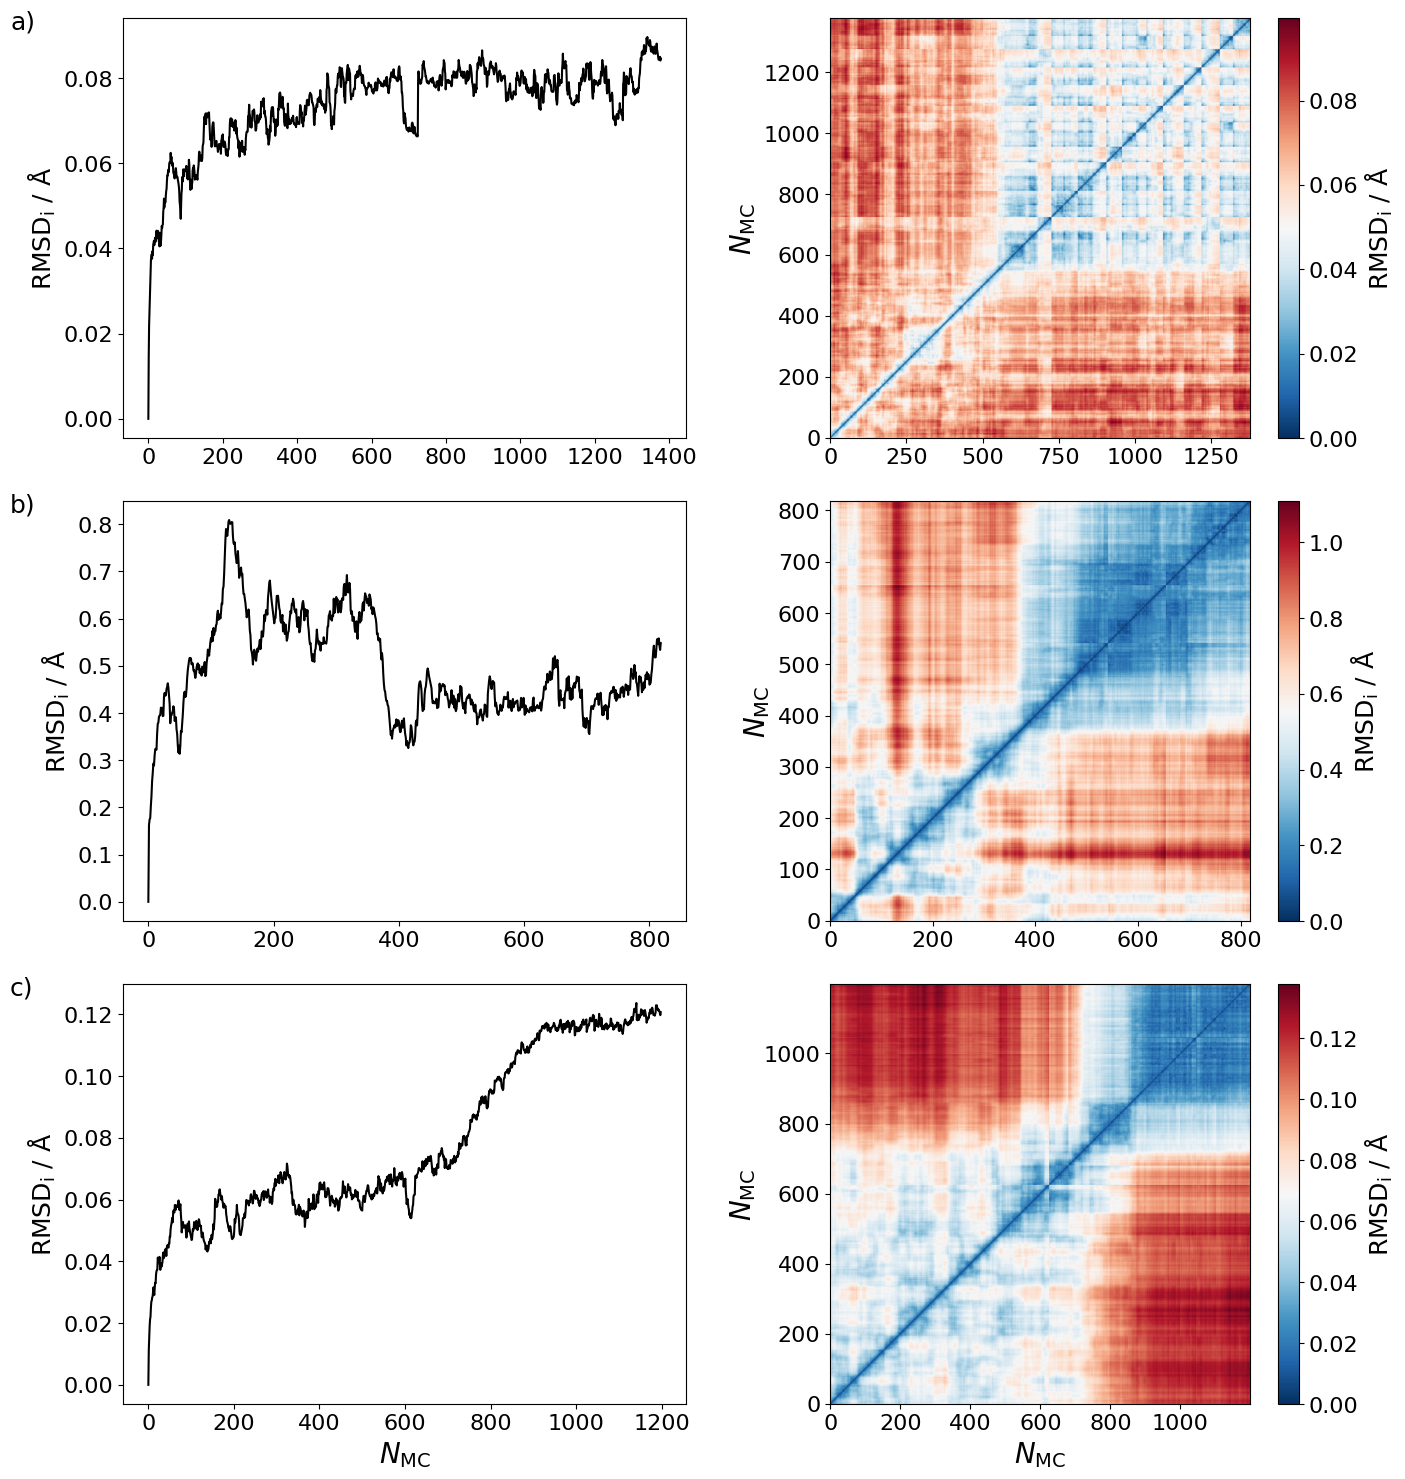

In [478]:
plot_SBUrmsd(path_plot1+'/rmsd_matrix.npy', 
             path_plot2+'/rmsd_matrix.npy', 
             path_plot3+'/rmsd_matrix.npy',)

In [479]:
def cell_collector(pathto):
    read_traj = read(f'{pathto}/traj_annealing.traj', index=':')
    cell_list = []
    for i in read_traj:
        cell = i.get_cell()[0][0]
        cell_list.append(cell)
    return cell_list


def plot_cell(pathtoSNU70, pathtoUiO66, pathtoMOF5OH): 
    cell_list_SNU70  = cell_collector(pathtoSNU70)
    cell_list_UiO66  = cell_collector(pathtoUiO66)
    cell_list_MOF5OH = cell_collector(pathtoMOF5OH)

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 16))
    plt.subplots_adjust(wspace=0.1)

    # axes[0].text(0, 1.075, r'a) SNU-70', transform=axes[0].transAxes, size=18)
    # axes[1].text(0, 1.075, r'b) UiO-66(Zr)-NH$_2$', transform=axes[1].transAxes, size=18)

    axes[0].text(-0.15, 0.95, r'a)', transform=axes[0].transAxes, size=18)
    axes[1].text(-0.15, 0.95, r'b)', transform=axes[1].transAxes, size=18)
    axes[2].text(-0.15, 0.95, r'c)', transform=axes[2].transAxes, size=18)

    axes[0].text(0.97, 0.88, r'MOF-5-OH', transform=axes[0].transAxes, size=18, horizontalalignment='right')
    axes[1].text(0.97, 0.64, r'SNU-70', transform=axes[1].transAxes, size=18, horizontalalignment='right')
    axes[2].text(0.97, 0.88, r'UiO-66(Zr)-NH$_2$', transform=axes[2].transAxes, size=18, horizontalalignment='right')

    axes[0].yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: f"{y:4.2f}")
    )

    axes[1].yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: f"{y:4.2f}")
    )
    axes[1].set_yticks(np.arange(30.21, 30.9 + 0.001, 0.03))
    axes[1].set_ylim(30.20, 30.40)

    axes[2].yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: f"{y:4.2f}")
    )

    axes[0].plot(cell_list_MOF5OH, color='black', linewidth=1.5)
    #axes[0].set_xlabel(r'$N_\mathrm{MC}$ ', size=18)
    axes[0].set_ylabel('Lattice parameter / Å', size=18)
    axes[0].tick_params(labelsize=16)

    axes[1].plot(cell_list_SNU70, color='black', linewidth=1.5)
    #axes[1].set_xlabel('Successful Monte Carlo steps / $-$', size=18)
    axes[1].set_ylabel('Lattice parameter / Å', size=18)
    axes[1].tick_params(labelsize=16)

    axes[2].plot(cell_list_UiO66, color='black', linewidth=1.5)
    axes[2].set_xlabel(r'$N_\mathrm{MC}$', size=20)
    axes[2].set_ylabel('Lattice parameter / Å', size=18)
    axes[2].tick_params(labelsize=16)

    plt.savefig(save_path+'/cellplot.pdf', pad_inches=0.1, bbox_inches='tight')
    plt.show()



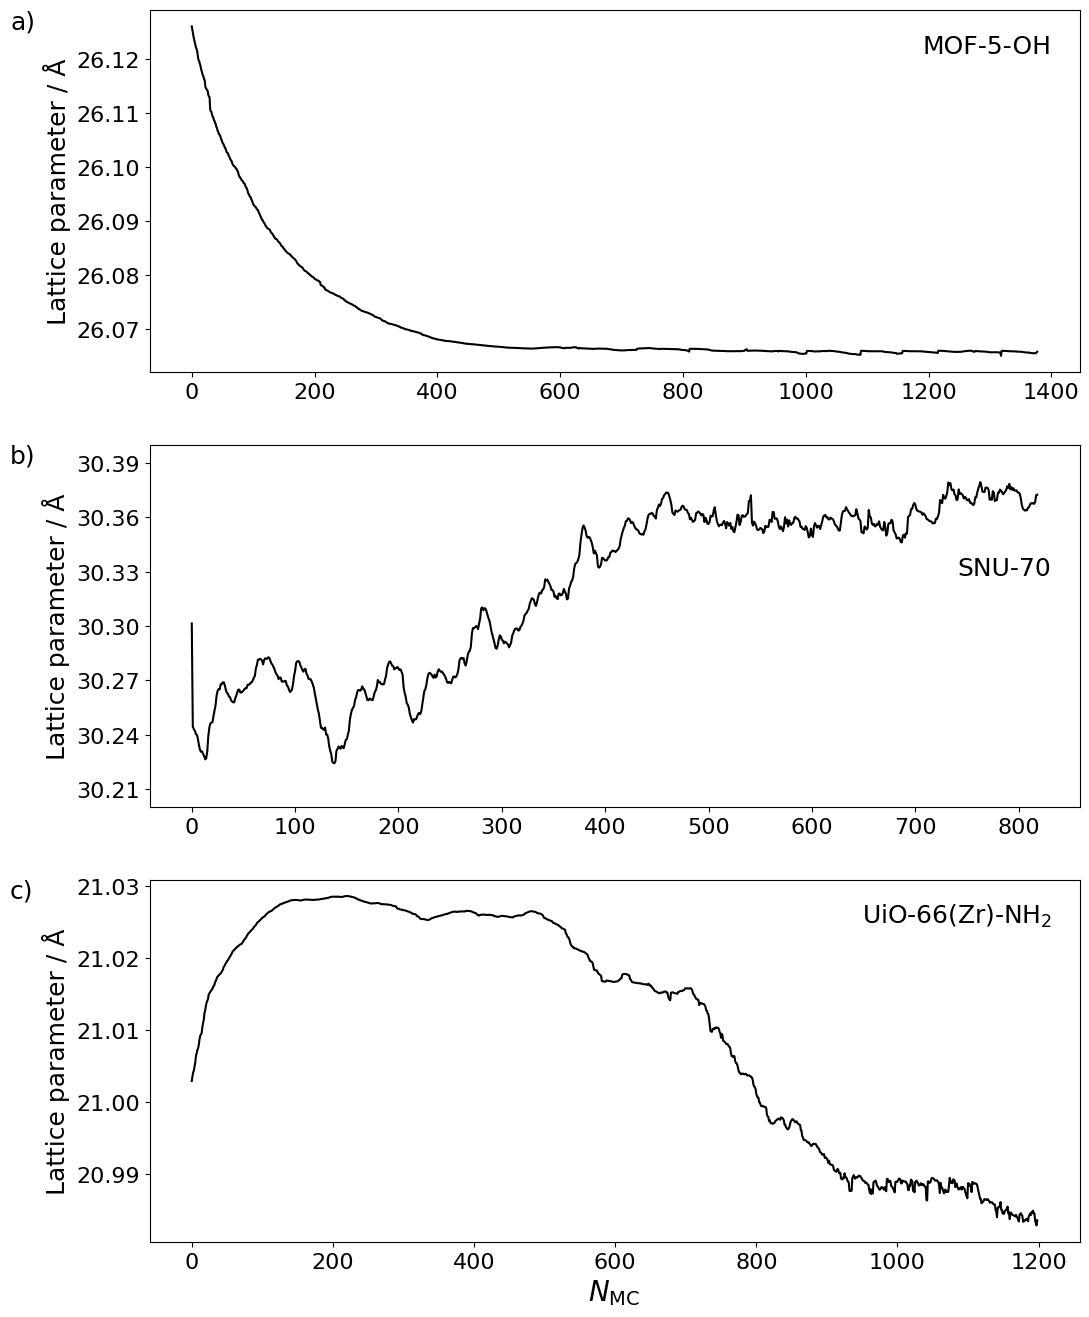

In [480]:
plot_cell(path_plot1, 
          path_plot2,
          path_plot3)

In [481]:
def min_structures_collecter(pathto, number_of_min_structures=10):

    traj = read(f'{pathto}/traj_annealing.traj', index=':')
    potential_energy_list = []
    for i in traj:
        energy = i.get_potential_energy()
        potential_energy_list.append(energy)

    potential_energy_first = potential_energy_list[0]

    print('''
          =======================================
          Set the number of min structures to:''', number_of_min_structures, '''
          =======================================

          ''')

    indices = []
    for k in range(0,int(number_of_min_structures)):
        index = potential_energy_list.index(sorted(potential_energy_list)[k])
        indices.append(index)
    print('Using structures with indices:', indices)
    print('Corresponding energies:', [potential_energy_list[i] for i in indices])
    print('Energy difference between starting structure and the lowest-energy structure:', round(potential_energy_first - potential_energy_list[indices[0]], ndigits=3), 'eV, i.e.,', round((potential_energy_first - potential_energy_list[indices[0]])*96485.3321/1000, ndigits=1), 'kJ/mol')

    if os.path.exists(f'{pathto}/min_structures'):
        raise Exception('Directory min_structures ALREADY EXISTS. Please remove it before running this function.')
    else:
        os.system(f'mkdir {pathto}/min_structures')

    for atomobject in indices:
        write(f'{pathto}/min_structures/{indices.index(atomobject):02d}_{atomobject}.xyz', traj[atomobject], append=False)

    print('Energy-minimized structures saved as xyz files in the directory min_structures.')

def read_xyz(filepath, exclude_hydrogen=True):
    """Read XYZ file and return atomic coordinates as a NumPy array, ignoring extra fields."""
    with open(filepath, 'r') as file:
        lines = file.readlines()
    num_atoms = int(lines[0].strip())
    coordinates = []
    for line in lines[2:2 + num_atoms]:
        fields = line.split()  # Split line into fields
        atom, x, y, z = fields[:4]  # Take only the first four fields
        if exclude_hydrogen and atom == "H":
            continue
        coordinates.append([float(x), float(y), float(z)])
    return np.array(coordinates)

def kabsch_alignment(P, Q):
    """Align P to Q using the Kabsch algorithm and return the aligned P."""
    # Center the coordinates
    P_centered = P - np.mean(P, axis=0)
    Q_centered = Q - np.mean(Q, axis=0)
    
    # Compute covariance matrix
    H = np.dot(P_centered.T, Q_centered)
    
    # Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(U, Vt)
    
    # Ensure a right-handed coordinate system
    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = np.dot(Vt.T, U.T)
    
    # Rotate P
    P_aligned = np.dot(P_centered, R)
    return P_aligned, Q_centered

def calculate_rmsd(P, Q):
    """Calculate RMSD between two aligned sets of coordinates."""
    diff = P - Q
    rmsd = np.sqrt(np.mean(np.sum(diff**2, axis=1)))
    return rmsd

def rmsd_main(directory):
    rmsd_results = []
    
    list_for_loop = []
    list_of_files = os.listdir(directory)
    for file in list_of_files:
        file_to_add = directory+'/'+file
        list_for_loop.append(file_to_add)
    list_for_loop.sort()
    
    for filename in list_for_loop:
        P = read_xyz(list_for_loop[0])
        Q = read_xyz(filename)
        P_aligned, Q_centered = kabsch_alignment(P, Q)
        rmsd = calculate_rmsd(P_aligned, Q_centered)
        rmsd_results.append((list_for_loop[0], filename, rmsd))
    return rmsd_results

def npyMinStructures(pathtominstructures):
    rmsd_results = rmsd_main(pathtominstructures)
    rmsd_selfexcluded = [rmsd_results[i][2] for i in range(1, len(rmsd_results))]
    np.save(f'{pathtominstructures}/rmsd_selfexcluded.npy', np.array(rmsd_selfexcluded))

def plot_rmsd(pathtoSNU70, pathtoUiO66, pathtoMOF5OH):

    pathtoSNU70  = np.load(f'{pathtoSNU70}/rmsd_selfexcluded.npy').tolist()
    pathtoUiO66  = np.load(f'{pathtoUiO66}/rmsd_selfexcluded.npy').tolist()
    pathtoMOF5OH = np.load(f'{pathtoMOF5OH}/rmsd_selfexcluded.npy').tolist()

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))
    plt.subplots_adjust(wspace=0.1)

    axes[0].text(-0.1, 0.95, r'a)', transform=axes[0].transAxes, size=18)
    axes[1].text(-0.1, 0.95, r'b)', transform=axes[1].transAxes, size=18)
    axes[2].text(-0.1, 0.95, r'c)', transform=axes[2].transAxes, size=18)

    axes[0].text(0.03, 0.93, r'MOF-5-OH', transform=axes[0].transAxes, size=18, horizontalalignment='left')
    axes[1].text(0.03, 0.93, r'SNU-70', transform=axes[1].transAxes, size=18, horizontalalignment='left')
    axes[2].text(0.03, 0.93, r'UiO-66(Zr)-NH$_2$', transform=axes[2].transAxes, size=18, horizontalalignment='left')

    axes[0].scatter(y=pathtoMOF5OH, x=[i+2 for i in range(len(pathtoMOF5OH))], marker='*', s=400, color='Darkslateblue', alpha=0.6, linestyle='None', edgecolors='None')
    axes[0].set_xticks([2, 3, 4, 5, 6, 7, 8, 9, 10])
    axes[0].set_ylim(-0.1, max(pathtoMOF5OH) + 0.2)
    #axes[0].set_xlabel('Lowest-energy structures ranking', size=18)
    axes[0].tick_params(labelsize =16)
    axes[0].set_ylabel('RMSD / Å', size=18)

    axes[1].scatter(y=pathtoSNU70, x=[i+2 for i in range(len(pathtoSNU70))], marker='*', s=400, color='firebrick', alpha=0.6, linestyle='None', edgecolors='None')
    axes[1].set_xticks([2, 3, 4, 5, 6, 7, 8, 9, 10])
    axes[1].set_ylim(-0.2, max(pathtoSNU70) + 0.4)
    #axes[1].set_xlabel('Lowest-energy structures ranking', size=18)
    axes[1].tick_params(labelsize =16)
    axes[1].set_ylabel('RMSD / Å', size=18)

    axes[2].scatter(y=pathtoUiO66, x=[i+2 for i in range(len(pathtoUiO66))], marker='*', s=400, color='dodgerblue', alpha=0.6, linestyle='None', edgecolors='None')
    axes[2].set_xticks([2, 3, 4, 5, 6, 7, 8, 9, 10])
    axes[2].set_ylim(-0.1, max(pathtoUiO66) + 0.2)
    axes[2].set_xlabel('Lowest-energy structures ranking', size=18)
    axes[2].tick_params(labelsize =16)
    axes[2].set_ylabel('RMSD / Å', size=18)
    #axes[2].yaxis.set_label_position("right") 
    #axes[2].yaxis.tick_right()
    
    plt.savefig(save_path+'rmsdMinStructures.pdf', pad_inches=0.1, bbox_inches='tight')
    plt.show()

In [322]:
min_structures_collecter(path_plot1)
min_structures_collecter(path_plot2)
min_structures_collecter(path_plot3)


          Set the number of min structures to: 10 

          
Using structures with indices: [793, 792, 791, 769, 768, 767, 763, 790, 788, 764]
Corresponding energies: [-3497.3454904814807, -3497.343843735298, -3497.341426646755, -3497.3412454083377, -3497.3412454083373, -3497.3396603313213, -3497.338392162105, -3497.3378651843186, -3497.336391819637, -3497.3347138433037]
Energy difference between starting structure and the lowest-energy structure: 3.292 eV, i.e., 317.6 kJ/mol


Exception: Directory min_structures ALREADY EXISTS. Please remove it before running this function.

In [323]:
npyMinStructures(path_plot3+'/min_structures')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 0: invalid start byte

In [324]:
min_structures_collecter(path_plot3)


          Set the number of min structures to: 10 

          
Using structures with indices: [851, 957, 1091, 1092, 905, 1216, 814, 956, 667, 852]
Corresponding energies: [-3064.9052219128553, -3064.904905519479, -3064.903950254778, -3064.901615062758, -3064.9014955509015, -3064.9014955186594, -3064.901463476156, -3064.9010553411267, -3064.9006132325317, -3064.900526362175]
Energy difference between starting structure and the lowest-energy structure: 0.661 eV, i.e., 63.8 kJ/mol


Exception: Directory min_structures ALREADY EXISTS. Please remove it before running this function.

In [325]:
npyMinStructures(path_plot1+'/min_structures')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 0: invalid start byte

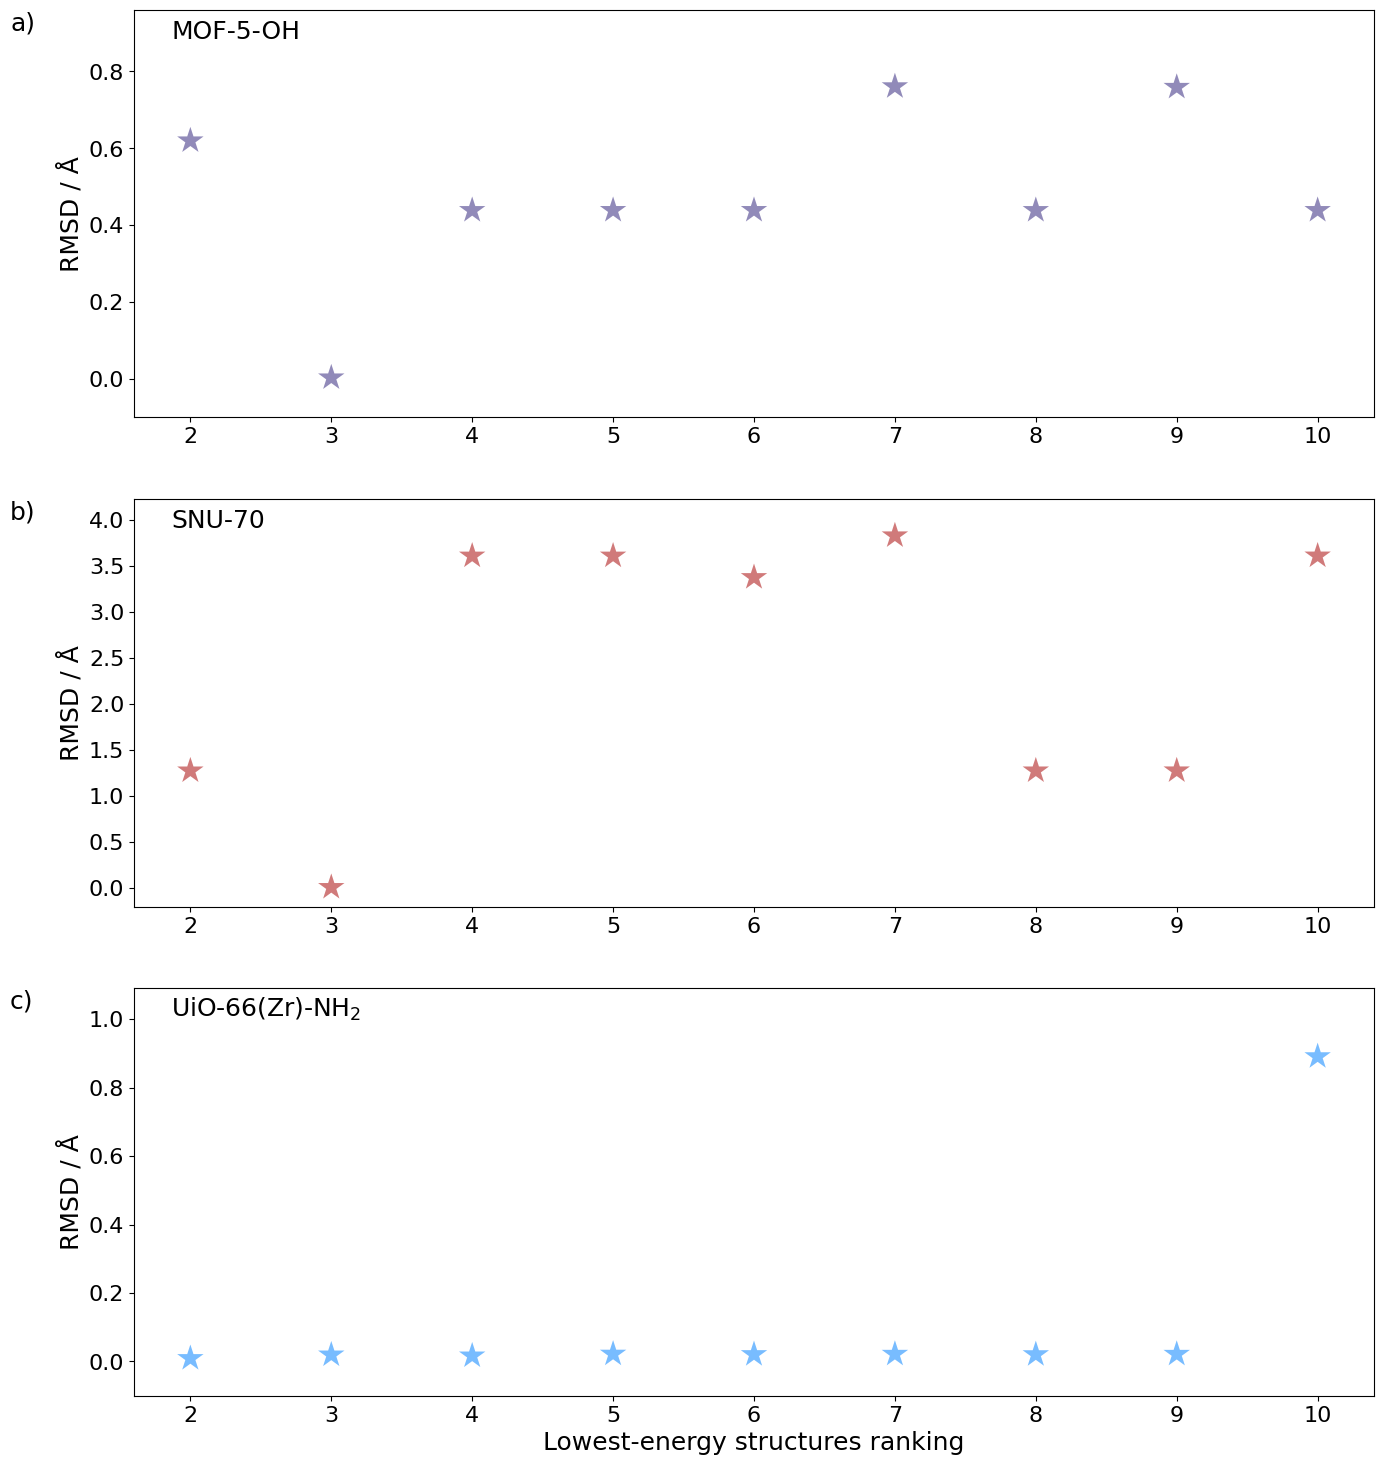

In [482]:
plot_rmsd(path_plot1+'/min_structures', path_plot2+'/min_structures', path_plot3+'/min_structures', )

In [318]:
# define function to read xrd data from files
def xrdtodata(xrd_files):
    """
    Function to read xrd data from files and return the data and maximas
    """
    # list to store data
    list_of_data = []
    # list to store maximas
    list_of_maximas = []
    # loop through each file
    for file in xrd_files:
        # Read data from csv file
        with open(file, 'r') as file:
            reader = csv.reader(file)
            data = list(reader)

        # Convert data to numpy array
        data = np.array(data)
        # split entries into two columns
        split_data = np.array([i[0].split() for i in data])
        # convert strings to floats
        split_data = np.array([[float(j) for j in i] for i in split_data])
        # normalize data
        split_data[:,1] = split_data[:,1]/(max(split_data[:,1]/100))
        # append to list of data
        list_of_data.append(split_data)
        # find maximas
        maximas = []
        for i in range(1, len(split_data)-1):
            try:
                if split_data[i,1] > split_data[i-1,1] and split_data[i,1] >= split_data[i+1,1] and max(split_data[i-5:i+5,1]) <=split_data[i,1] and split_data[i,0] < 30.0:
                    maximas.append(split_data[i])
            except:
                if split_data[i,1] > split_data[i-1,1] and split_data[i,1] >= split_data[i+1,1] and max(split_data[i:i+5,1]) <=split_data[i,1] and split_data[i,0] < 30.0:
                    maximas.append(split_data[i])
        maximas = sorted(maximas, key=lambda x: x[1], reverse=True)
        maximas = np.array(maximas[0:5])
        # append to list of maximas
        list_of_maximas.append(maximas)
    return list_of_data, list_of_maximas



In [361]:
path_plot2

'results/uio-66-nh2'

In [374]:
#path_plot1 = "results/snu-70"
#path_plot2 = "results/uio-66-nh2"
#path_plot3 = "results/mof-5-oh"


# list of xrd files
xrd_files_snu70 = [
    path_plot1+'/xrd_snu70_engauge_normalized.dat',
    path_plot1+'/xrd_start_averaged.dat',
    path_plot1+'/xrd_lowest_averaged.dat',
]

xrd_files_uio66 = [
    path_plot2+'/uio66nh2_xrd_engauge_normalized.dat',
    path_plot2+'/xrd_start_averaged.dat',
    path_plot2+'/xrd_lowest_averaged.dat',
]

xrd_files_mof5oh = [
    path_plot3+'/mof-5-oh_0.7_xrd_engauge_normalized.dat',
    path_plot3+'/xrd_start_averaged.dat',
    path_plot3+'/xrd_lowest_averaged.dat',
]


# call the function
list_of_data_snu70, list_of_maxima_snu70   = xrdtodata(xrd_files_snu70)
list_of_data_uio66, list_of_maxima_uio66   = xrdtodata(xrd_files_uio66)
list_of_data_mof5oh, list_of_maxima_mof5oh = xrdtodata(xrd_files_mof5oh)

In [ ]:
def xrd_plotter():

    # plot data
    fig, (ax, bx, cx) = plt.subplots(ncols=1,nrows=3, figsize=(16, 18)) 
    plt.subplots_adjust(wspace=0.1, hspace=0.2)

    list_of_labels_snu70  = ['SNU-70 experimental', 'SNU-70 initial structure', 'SNU-70 after simulated annealing']
    list_of_labels_uio66  = [r'UiO-66(Zr)-NH$_2$ experimental', r'UiO-66(Zr)-NH$_2$ initial structure', r'UiO-66(Zr)-NH$_2$ after simulated annealing']
    list_of_labels_mof5oh = [r'MOF-5-OH experimental', r'MOF-5-OH initial structure', r'MOF-5-OH after simulated annealing']
    list_of_colors = ['black', 'firebrick', 'dodgerblue']

    ax.text(-0.08, 0.98, r'a)', transform=ax.transAxes, size=18)
    bx.text(-0.08, 0.98, r'b)', transform=bx.transAxes, size=18)
    cx.text(-0.08, 0.98, r'c)', transform=cx.transAxes, size=18)

    for i in range(len(list_of_data_mof5oh)):
        split_data = list_of_data_mof5oh[i]
        maximas = list_of_maxima_mof5oh[i]
        y_offset = i * 60
        # plot data
        ax.plot(split_data[:,0], split_data[:,1]+y_offset, label=list_of_labels_mof5oh[i], linewidth=2, color=list_of_colors[i], alpha=0.8)
        # ax.scatter(maximas[:,0], maximas[:,1]+y_offset, color='red', label='Maximas of '+list_of_labels[i], s=4)
        # ax.vlines(maximas[:,0], ymin=-5, ymax=maximas[:,1]+y_offset, color='red', linewidth=1, linestyles='--')
        for j in range(len(maximas)):
            if j > 0 and abs(maximas[j,1] - maximas[j-1,1]) < 5 and abs(maximas[j,0] - maximas[j-1,0]) < 0.5:
                ax.text(maximas[j,0]+0.35, maximas[j,1]+15+y_offset, f"{maximas[j,0]:.2f}", fontsize=14, color=list_of_colors[i], alpha=0.8)
            else:
                ax.text(maximas[j,0]+0.35, maximas[j,1]+3+y_offset, f"{maximas[j,0]:.2f}", fontsize=14, color=list_of_colors[i], alpha=0.8)
    # ax.set_xlabel('2θ / °', fontsize=15)
    ax.set_ylabel('Intensity / a.u.', fontsize=18)
    #ax.set_xlabel('2$θ$ / °', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_ylim(-5, 250)
    ax.set_xlim(5, 28)
    ax.legend(fontsize=14)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

    for i in range(len(list_of_data_snu70)):
        split_data = list_of_data_snu70[i]
        maximas = list_of_maxima_snu70[i]
        y_offset = i * 60
        # plot data
        bx.plot(split_data[:,0], split_data[:,1]+y_offset, label=list_of_labels_snu70[i], linewidth=2, color=list_of_colors[i], alpha=0.8)
        # ax.scatter(maximas[:,0], maximas[:,1]+y_offset, color='red', label='Maximas of '+list_of_labels[i], s=4)
        # ax.vlines(maximas[:,0], ymin=-5, ymax=maximas[:,1]+y_offset, color='red', linewidth=1, linestyles='--')
        for j in range(len(maximas)):
            if j > 0 and abs(maximas[j,1] - maximas[j-1,1]) < 5 and abs(maximas[j,0] - maximas[j-1,0]) < 0.5:
                bx.text(maximas[j,0]+0.35, maximas[j,1]+15+y_offset, f"{maximas[j,0]:.2f}", fontsize=14, color=list_of_colors[i], alpha=0.8)
            else:
                bx.text(maximas[j,0]+0.35, maximas[j,1]+3+y_offset, f"{maximas[j,0]:.2f}", fontsize=14, color=list_of_colors[i], alpha=0.8)
    # ax.set_xlabel('2θ / °', fontsize=15)
    bx.set_ylabel('Intensity / a.u.', fontsize=18)
    #bx.set_xlabel('2$θ$ / °', fontsize=16)
    bx.tick_params(axis='both', which='major', labelsize=16)
    bx.set_ylim(-5, 250)
    bx.set_xlim(5, 28)
    bx.legend(fontsize=14)
    bx.xaxis.set_major_locator(ticker.MultipleLocator(3))

    for i in range(len(list_of_data_uio66)):
        split_data = list_of_data_uio66[i]
        maximas = list_of_maxima_uio66[i]
        y_offset = i * 60
        # plot data
        cx.plot(split_data[:,0], split_data[:,1]+y_offset, label=list_of_labels_uio66[i], linewidth=2, color=list_of_colors[i], alpha=0.8)
        # bx.scatter(maximas[:,0], maximas[:,1]+y_offset, color='red', label='Maximas of '+list_of_labels[i], s=4)
        # bx.vlines(maximas[:,0], ymin=-5, ymax=maximas[:,1]+y_offset, color='red', linewidth=1, linestyles='--')
        for j in range(len(maximas)):
            if j > 0 and abs(maximas[j,1] - maximas[j-1,1]) < 5 and abs(maximas[j,0] - maximas[j-1,0]) < 0.5:
                cx.text(maximas[j,0]+0.2, maximas[j,1]+15+y_offset, f"{maximas[j,0]:.2f}", fontsize=14, color=list_of_colors[i], alpha=0.8)
            else:
                cx.text(maximas[j,0]+0.2, maximas[j,1]+3+y_offset, f"{maximas[j,0]:.2f}", fontsize=14, color=list_of_colors[i], alpha=0.8)
    cx.set_xlabel('2$θ$ / °', fontsize=20)
    cx.set_ylabel('Intensity / a.u.', fontsize=18)
    cx.tick_params(axis='both', which='major', labelsize=16)
    cx.set_ylim(-5, 250)
    cx.set_xlim(5,28)
    cx.legend(fontsize=14)
    cx.xaxis.set_major_locator(ticker.MultipleLocator(3))


    plt.savefig(save_path+'xrd_plot.pdf', pad_inches=0.1, bbox_inches='tight')
    plt.show(block=True)
    return None

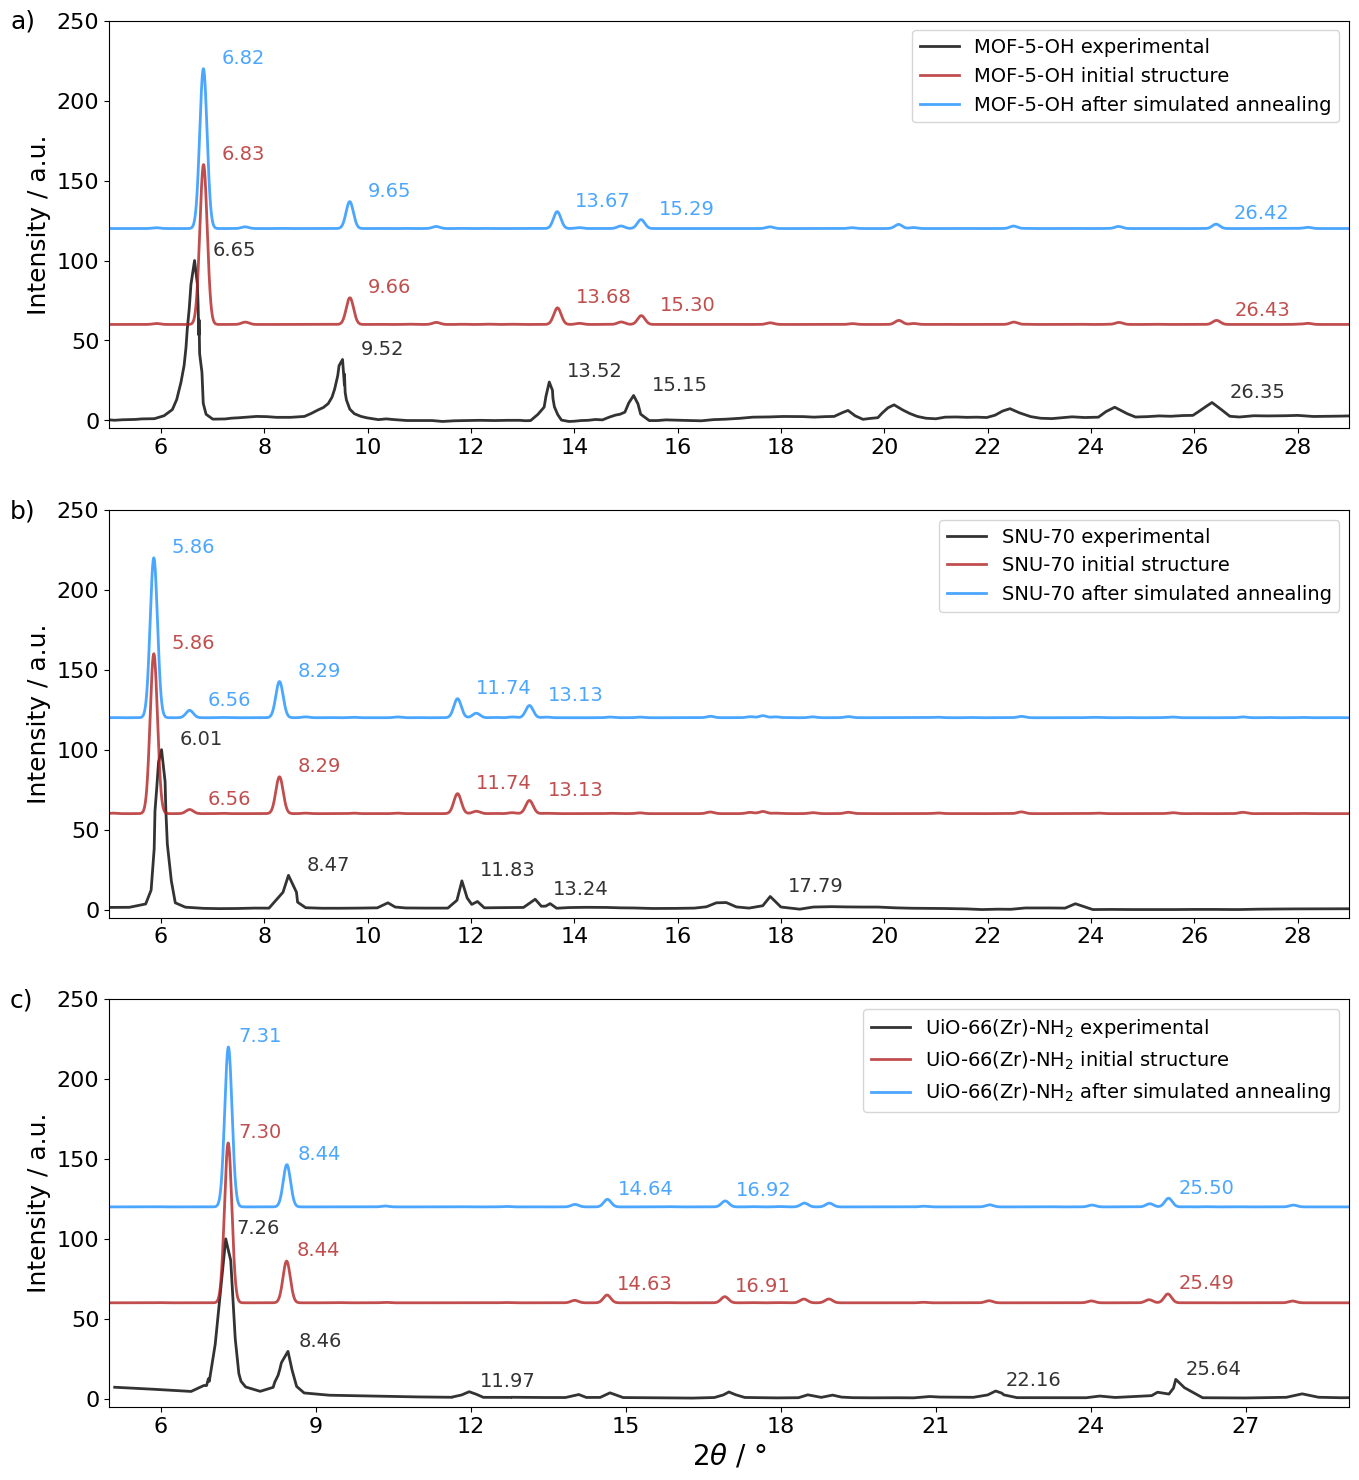

In [492]:
xrd_plotter()

In [470]:
def rdf_plotter():
    # Read RDF data from files
    rdf_files_mof5oh_ann = [
        path_plot3+'/rdf_Zn-C_optimal.out',
        path_plot3+'/rdf_Zn-O_optimal.out',
        path_plot3+'/rdf_Zn-Zn_optimal.out'
        ]
    rdf_files_mof5oh = [
        path_plot3+'/rdf_Zn-C_initial.out',
        path_plot3+'/rdf_Zn-O_initial.out',
        path_plot3+'/rdf_Zn-Zn_initial.out'
        ]

    rdf_files_snu_ann = [
        path_plot1+'/rdf_Zn-C_lowest.out',
        path_plot1+'/rdf_Zn-O_lowest.out',
        path_plot1+'/rdf_Zn-Zn_lowest.out'
        ]
    rdf_files_snu = [
        path_plot1+'/rdf_Zn-C_start.out',
        path_plot1+'/rdf_Zn-O_start.out',
        path_plot1+'/rdf_Zn-Zn_start.out'
        ]

    rdf_files_uio_ann = [
        path_plot2+'/rdf_Zr-C_lowest.out',
        path_plot2+'/rdf_Zr-O_lowest.out',
        path_plot2+'/rdf_Zr-Zr_lowest.out'
        ]
    rdf_files_uio = [
        path_plot2+'/rdf_Zr-C_start.out',
        path_plot2+'/rdf_Zr-O_start.out',
        path_plot2+'/rdf_Zr-Zr_start.out'
        ]

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
    plt.subplots_adjust(wspace=0.25, hspace=0.18)


    axes[0][0].text(-0.175, 1.0, r'a)', transform=axes[0][0].transAxes, size=18)
    axes[0][1].text(-0.175, 1.0, r'b)', transform=axes[0][1].transAxes, size=18)
    axes[0][2].text(-0.175, 1.0, r'c)', transform=axes[0][2].transAxes, size=18)

    # axes[0][0].text(0.03, 0.93, r'SNU-70', transform=axes[0][0].transAxes, size=18, horizontalalignment='left')
    # axes[1][0].text(0.03, 0.93, r'UiO-66(Zr)-NH$_2$', transform=axes[1][0].transAxes, size=18, horizontalalignment='left')
############
    for i in range(len(rdf_files_mof5oh_ann)):
        with open(rdf_files_mof5oh_ann[i], 'r') as file:
                    reader = csv.reader(file, delimiter=' ')
                    data = list(reader)
        # Convert data to numpy array
        data = np.array(data, dtype=float)
        if i == 0:
            axes[i][0].plot(data[2:,0], data[2:,1], color="dodgerblue", linewidth=4.5, label=f'MOF-5-OH after SA', alpha=0.5)
        else:
            axes[i][0].plot(data[2:,0], data[2:,1], color="dodgerblue", linewidth=4.5, alpha=0.5)

    for i in range(len(rdf_files_mof5oh)):
        with open(rdf_files_mof5oh[i], 'r') as file:
                    reader = csv.reader(file, delimiter=' ')
                    data = list(reader)
        # Convert data to numpy array
        data = np.array(data, dtype=float)
        if i == 0:
            axes[i][0].plot(data[2:,0], data[2:,1], color="black", linewidth=2, label=f'MOF-5-OH before SA')
        else:
            axes[i][0].plot(data[2:,0], data[2:,1], color="black", linewidth=2)

    axes[2][0].set_xlabel('Distance / Å', size=18)

    for i in range(len(rdf_files_snu_ann)):
        axes[i][0].set_ylabel(f'$g_{{\\text{{{["Zn-C", "Zn-O", "Zn-Zn"][i]}}}}}$', size=20)
        axes[i][0].tick_params(labelsize=16)
        axes[i][0].set_xlim(1, 13)
        axes[i][0].xaxis.set_major_locator(ticker.MultipleLocator(2))
        if i == 0:
            axes[i][0].legend(fontsize=13, frameon = False)

############
    for i in range(len(rdf_files_snu_ann)):
        with open(rdf_files_snu_ann[i], 'r') as file:
                    reader = csv.reader(file, delimiter=' ')
                    data = list(reader)
        # Convert data to numpy array
        data = np.array(data, dtype=float)
        if i == 0:
            axes[i][1].plot(data[2:,0], data[2:,1], color="Darkslateblue", linewidth=4.5, label=f'SNU-70 after SA', alpha=0.5)
        else:
            axes[i][1].plot(data[2:,0], data[2:,1], color="Darkslateblue", linewidth=4.5, alpha=0.5)

    for i in range(len(rdf_files_snu)):
        with open(rdf_files_snu[i], 'r') as file:
                    reader = csv.reader(file, delimiter=' ')
                    data = list(reader)
        # Convert data to numpy array
        data = np.array(data, dtype=float)
        if i == 0:
            axes[i][1].plot(data[2:,0], data[2:,1], color="black", linewidth=2, label=f'SNU-70 before SA')
        else:
            axes[i][1].plot(data[2:,0], data[2:,1], color="black", linewidth=2)

    axes[2][1].set_xlabel('Distance / Å', size=18)

    for i in range(len(rdf_files_snu_ann)):
        axes[i][1].set_ylabel(f'$g_{{\\text{{{["Zn-C", "Zn-O", "Zn-Zn"][i]}}}}}$', size=20)
        axes[i][1].tick_params(labelsize=16)
        axes[i][1].set_xlim(1, 15)
        axes[i][1].xaxis.set_major_locator(ticker.MultipleLocator(2))
        if i == 0:
            axes[i][1].legend(fontsize=13, frameon = False)

    for i in range(len(rdf_files_uio_ann)):
        with open(rdf_files_uio_ann[i], 'r') as file:
                    reader = csv.reader(file, delimiter=' ')
                    data = list(reader)
        # Convert data to numpy array
        data = np.array(data, dtype=float)
        if i == 0:
            axes[i][2].plot(data[2:,0], data[2:,1], color="firebrick", linewidth=4.5, label=f'UiO-66(Zr)-NH$_2$ after SA', alpha=0.5)
        else:
            axes[i][2].plot(data[2:,0], data[2:,1], color="firebrick", linewidth=4.5, alpha=0.5)

    for i in range(len(rdf_files_uio)):
        with open(rdf_files_uio[i], 'r') as file:
                    reader = csv.reader(file, delimiter=' ')
                    data = list(reader)
        # Convert data to numpy array
        data = np.array(data, dtype=float)
        if i == 0:
            axes[i][2].plot(data[2:,0], data[2:,1], color="black", linewidth=2, label=f'UiO-66(Zr)-NH$_2$ before SA')
        else:
            axes[i][2].plot(data[2:,0], data[2:,1], color="black", linewidth=2)

    axes[2][2].set_xlabel('Distance / Å', size=18)

    for i in range(len(rdf_files_uio_ann)):
        axes[i][2].set_ylabel(f'$g_{{\\text{{{["Zr-C", "Zr-O", "Zr-Zr"][i]}}}}}$', size=20)
        axes[i][2].tick_params(labelsize=16)
        axes[i][2].set_xlim(1.5, 10.5)
        if i == 0:
            axes[i][2].legend(fontsize=13, frameon = False)


    plt.savefig(save_path+'rdf_plot.pdf', pad_inches=0.1, bbox_inches='tight')
    plt.show()


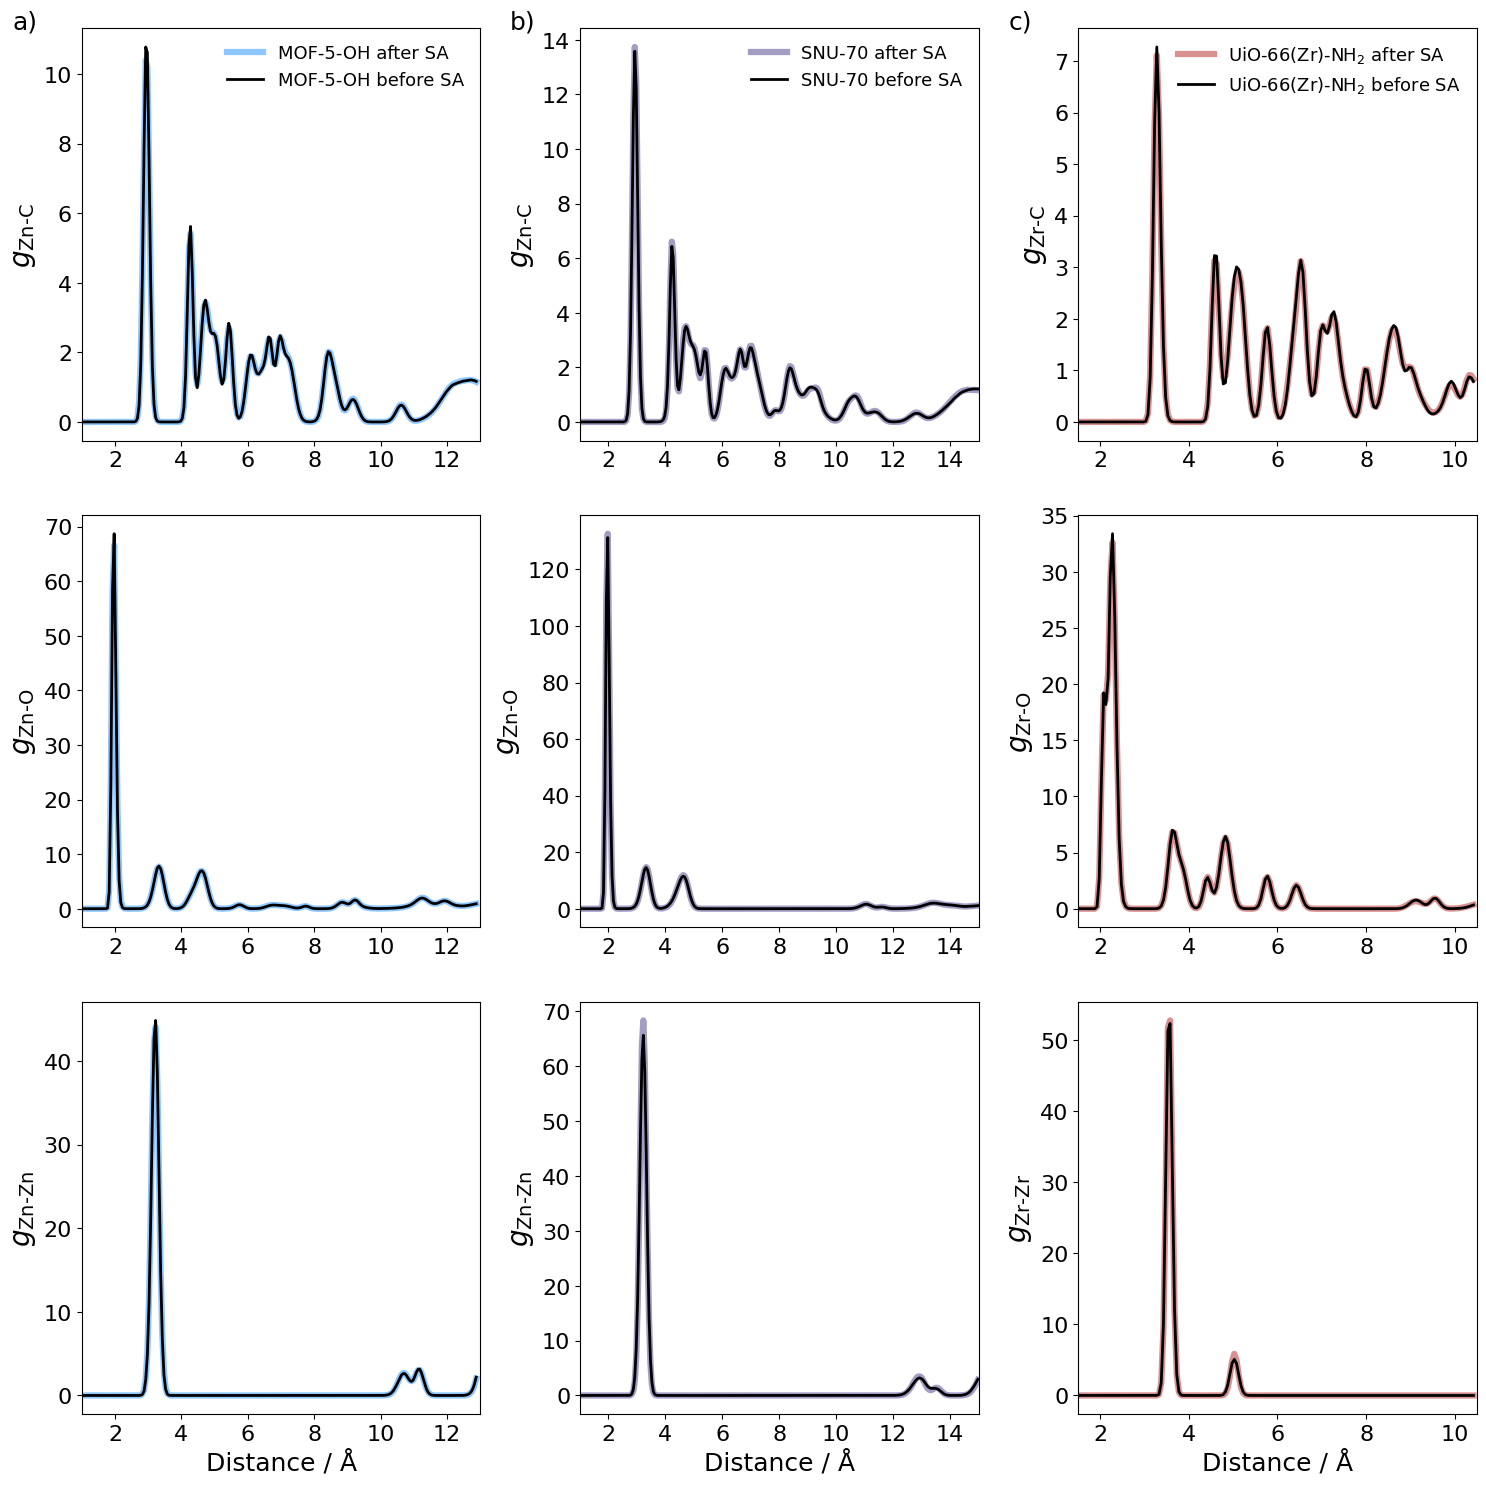

In [471]:
rdf_plotter()